In [36]:
import time, sys, joblib

import pandas as pd

sys.path.append('/home/yilingh/SI-Interaction')
from selectinf.Simulation.plotting_helpers import *
from selectinf.Simulation.H1.nonlinear_H1_helpers import *

In [37]:
##%%
def filter_pval_dict(pval_dict, target_dict, threshold=0.05):
    target_dict_df = pd.DataFrame(target_dict)
    filtered_dict = {}
    for par in pval_dict.keys():
        filtered_dict[par] = {}
        par_dict = pval_dict[par]
        target_df_par = target_dict_df[target_dict_df['parameter'] == par]
        
        for method in par_dict.keys():
            targets_p_m = (target_df_par[target_df_par['method'] == method])['target']
            selected_targets = (np.abs(targets_p_m) < threshold)
            pvals_p_m = np.array(pval_dict[par][method])
            filtered_dict[par][method] = pvals_p_m[selected_targets].tolist()
    
    return filtered_dict

# Vary SNR with Strong Hierarchy

In [3]:
dir_list = ['results0_16.pkl', 'results16_32.pkl', 'results32_48.pkl', 'results48_64.pkl']

In [13]:
opers = []
pvals = []
targets = []
for path in dir_list:
    result = joblib.load(path)
    list_of_oper = [tup[0] for tup in result]
    list_of_pval = [tup[1] for tup in result]
    list_of_targets = [tup[2] for tup in result]
    opers.append(combine_lists(list_of_oper))
    pvals.append(combine_nested_lists(list_of_pval))
    targets.append(combine_lists(list_of_targets))

In [8]:
oper_char = combine_lists(opers)

In [14]:
pvals_all = combine_nested_lists(pvals)

In [16]:
targets_all = combine_lists(targets)

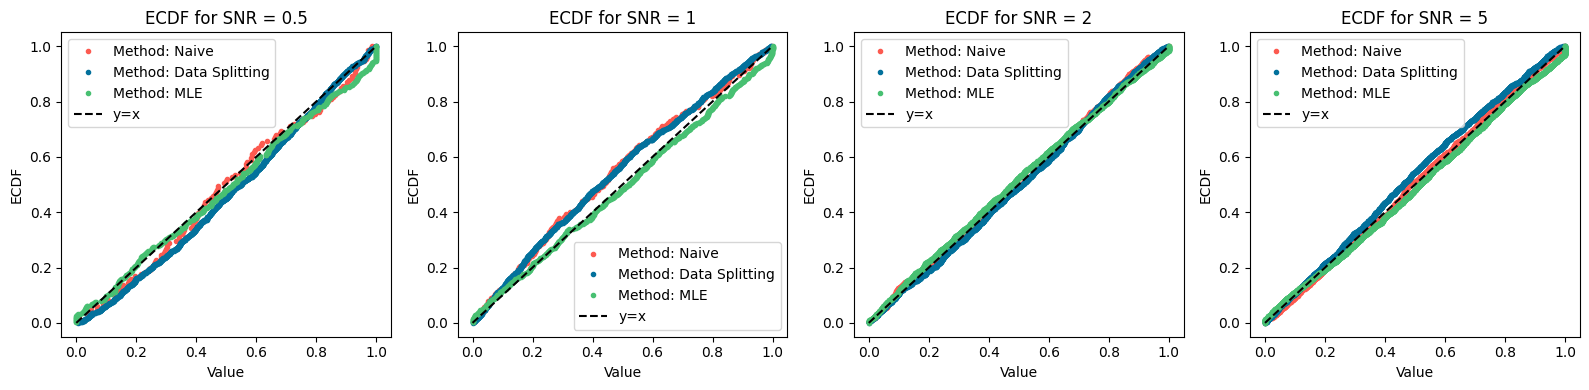

In [19]:
plot_ecdfs(pvals_all, xaxis="SNR")

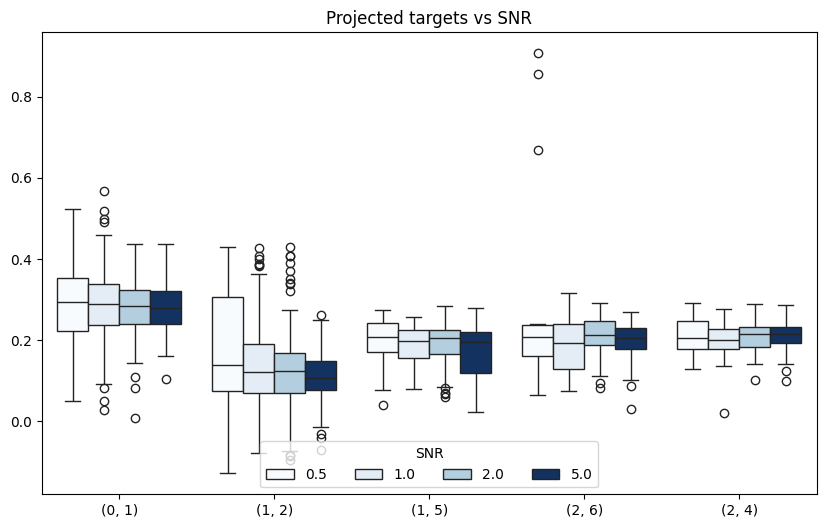

In [20]:
plot_multi_targets(targets_all, xaxis="SNR")

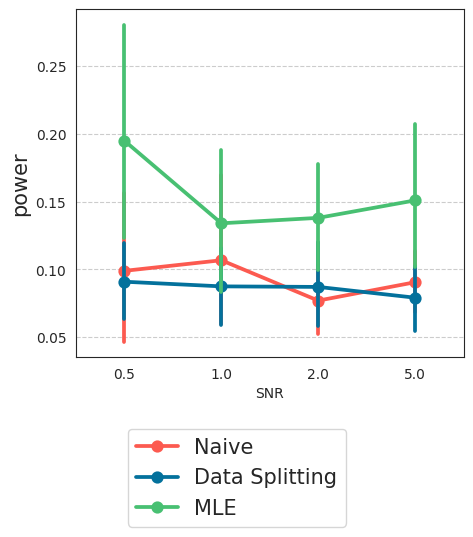

In [21]:
point_plot_multimetrics(oper_char_df=pd.DataFrame(oper_char),
                        x_axis="SNR",
                        hue="method",
                        metric_list=["power"])

# Vary SNR with Weak Hierarchy

In [62]:
dir_list_wh = ['results0_40_wh.pkl', 'results40_80_wh.pkl',
               'results80_120_wh.pkl', 'results120_160_wh.pkl',
               'results160_200_wh.pkl', 'results200_240_wh.pkl',
               'results240_280_wh.pkl', 'results280_320_wh.pkl',
               'results320_360_wh.pkl', 'results360_400_wh.pkl',
               'results400_440_wh.pkl', 'results440_480_wh.pkl'
               ]

In [63]:
opers = []
pvals = []
targets = []
for path in dir_list_wh:
    result = joblib.load(path)
    list_of_oper = [tup[0] for tup in result]
    list_of_pval = [tup[1] for tup in result]
    list_of_targets = [tup[2] for tup in result]
    opers.append(combine_lists(list_of_oper))
    pvals.append(combine_nested_lists(list_of_pval))
    targets.append(combine_lists(list_of_targets))

In [64]:
oper_char = combine_lists(opers)

In [72]:
pvals_all = combine_nested_lists(pvals)

In [73]:
targets_all = combine_lists(targets)

In [76]:
## Plotting dict: SNR - Method - List of pvals
filtered_dict = filter_pval_dict(pvals_all, targets_all, threshold = 0.15)

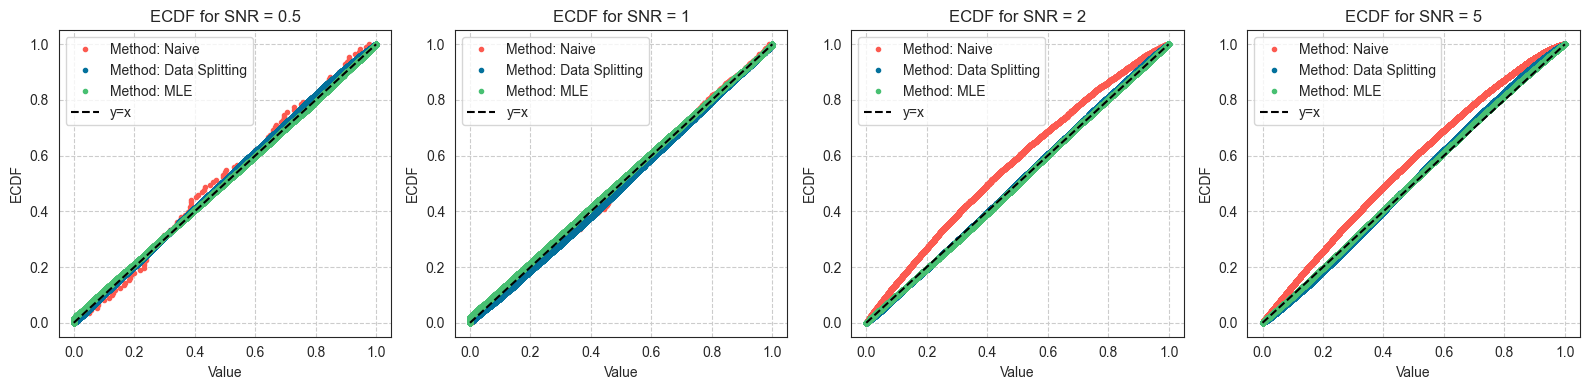

In [77]:
plot_ecdfs(filtered_dict, xaxis="SNR")

In [87]:
## Plotting dict: SNR - Method - List of pvals
filtered_dict = filter_pval_dict(pvals_all, targets_all, threshold = 10)

In [88]:
pd.DataFrame(targets_all)

,parameter,target,target id,method
0,0.5,0.265930,"(0, 1)",Naive
1,0.5,0.401829,"(0, 2)",Naive
2,0.5,0.306903,"(0, 3)",Naive
3,0.5,0.377620,"(0, 4)",Naive
4,0.5,0.395033,"(0, 5)",Naive
...,...,...,...,...
533916,5.0,-0.013777,"(16, 18)",MLE
533917,5.0,0.000989,"(16, 19)",MLE
533918,5.0,0.043044,"(17, 18)",MLE
533919,5.0,-0.033803,"(17, 19)",MLE


In [89]:
# List and array representations of true interaction indices
active_inter_list_true = np.array([[0, 1], [1, 2], [2, 4], [1, 5], [2, 6]])
active_inter_list_true_list = [(x[0], x[1]) for x in active_inter_list_true]

In [90]:
import ast
def filter_targets(targets_dict, true_inter_list):
    targets = targets_dict['target id']
    true_flag = [ast.literal_eval(t) in true_inter_list for t in targets]
    filtered_dict = {}
    for k in targets_dict.keys():
        filtered_dict[k] = np.array(targets_dict[k])[true_flag].tolist()
        
    return filtered_dict
        

In [91]:
filtered_targets = filter_targets(targets_all, active_inter_list_true_list)

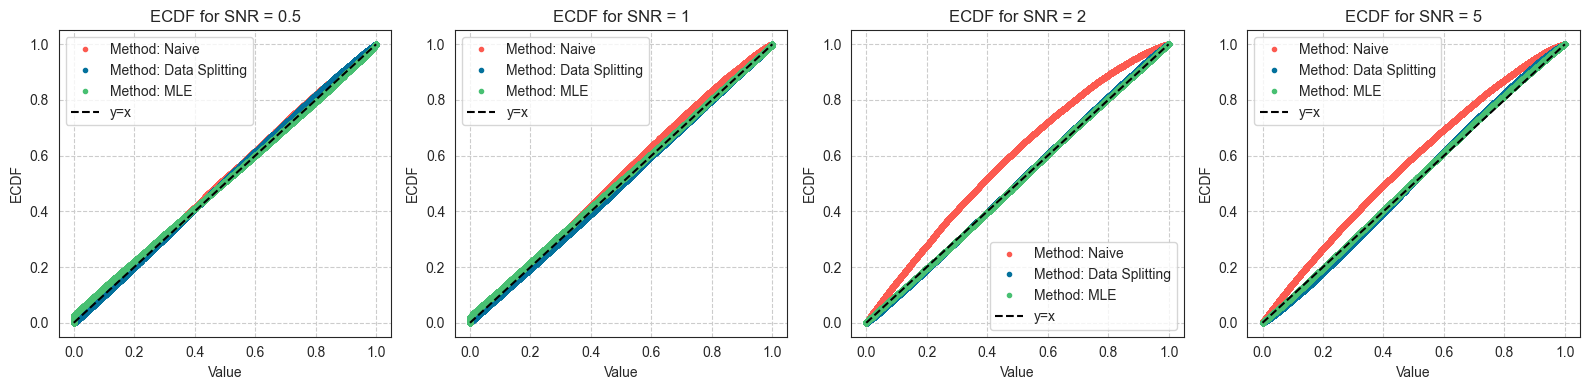

In [92]:
plot_ecdfs(filtered_dict, xaxis="SNR")

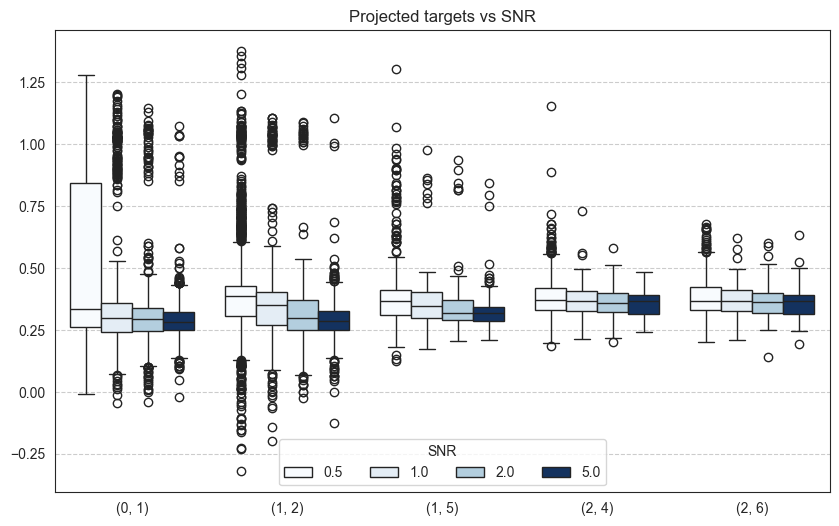

In [85]:
plot_multi_targets(filtered_targets, xaxis="SNR")

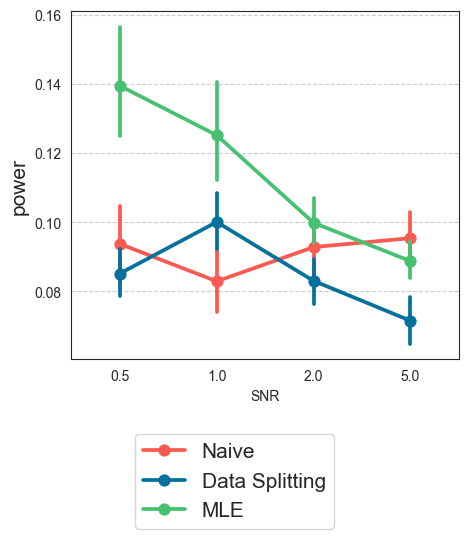

In [86]:
point_plot_multimetrics(oper_char_df=pd.DataFrame(oper_char),
                        x_axis="SNR",
                        hue="method",
                        metric_list=["power"])

In [93]:
targets_df = pd.DataFrame(targets_all)

In [94]:
targets_df

,parameter,target,target id,method
0,0.5,0.265930,"(0, 1)",Naive
1,0.5,0.401829,"(0, 2)",Naive
2,0.5,0.306903,"(0, 3)",Naive
3,0.5,0.377620,"(0, 4)",Naive
4,0.5,0.395033,"(0, 5)",Naive
...,...,...,...,...
533916,5.0,-0.013777,"(16, 18)",MLE
533917,5.0,0.000989,"(16, 19)",MLE
533918,5.0,0.043044,"(17, 18)",MLE
533919,5.0,-0.033803,"(17, 19)",MLE


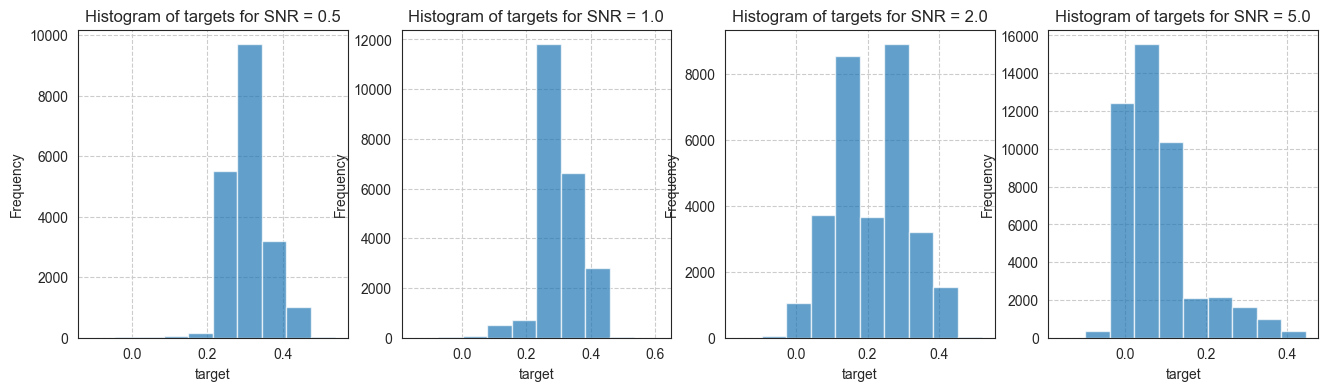

In [104]:
targets_df_naive = targets_df[targets_df['method']=='Naive']
# Grouping by 'y' and plotting histograms
grouped_targets = targets_df_naive.groupby('parameter')
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))
i = 0
for name, group in grouped_targets:
    axs[i].hist(group['target'], bins=10, alpha=0.7)
    axs[i].set_xlabel('target')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram of targets for SNR = {name}')
    i += 1